In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

df = pd.read_csv('Prueba_1.csv', sep=";")

df.rename(columns={'DG por partido': 'DGpptdo'}, inplace=True)

df

,Puesto,DGpptdo
0,1,5.88
1,2,0.88
2,3,0.50
3,4,0.13
4,5,1.17
...,...,...
139,8,1.83
140,9,0.00
141,10,-6.33
142,11,-5.00


In [80]:
y = df.Puesto
x = df.DGpptdo.values.reshape(-1, 1)

print(x.shape,y.shape)

(144, 1) (144,)


In [194]:
# Regresión polinómica
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(x, y)
r_sq_poly = poly_model.score(x, y)
print(r_sq_poly)

x_range = np.linspace(x.min(), x.max(), 1000).reshape(-1, 1)
y_pred_poly = poly_model.predict(x_range)

for degree in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    scores = cross_val_score(model, x, y, cv=5, scoring='r2')
    print(f"Grado {degree}: R² promedio CV = {scores.mean():.4f}")

0.6633854469987881
Grado 1: R² promedio CV = 0.5946
Grado 2: R² promedio CV = 0.6382
Grado 3: R² promedio CV = 0.6756
Grado 4: R² promedio CV = 0.6841
Grado 5: R² promedio CV = 0.6855
Grado 6: R² promedio CV = 0.6800
Grado 7: R² promedio CV = 0.6802
Grado 8: R² promedio CV = 0.4108
Grado 9: R² promedio CV = -1.8549


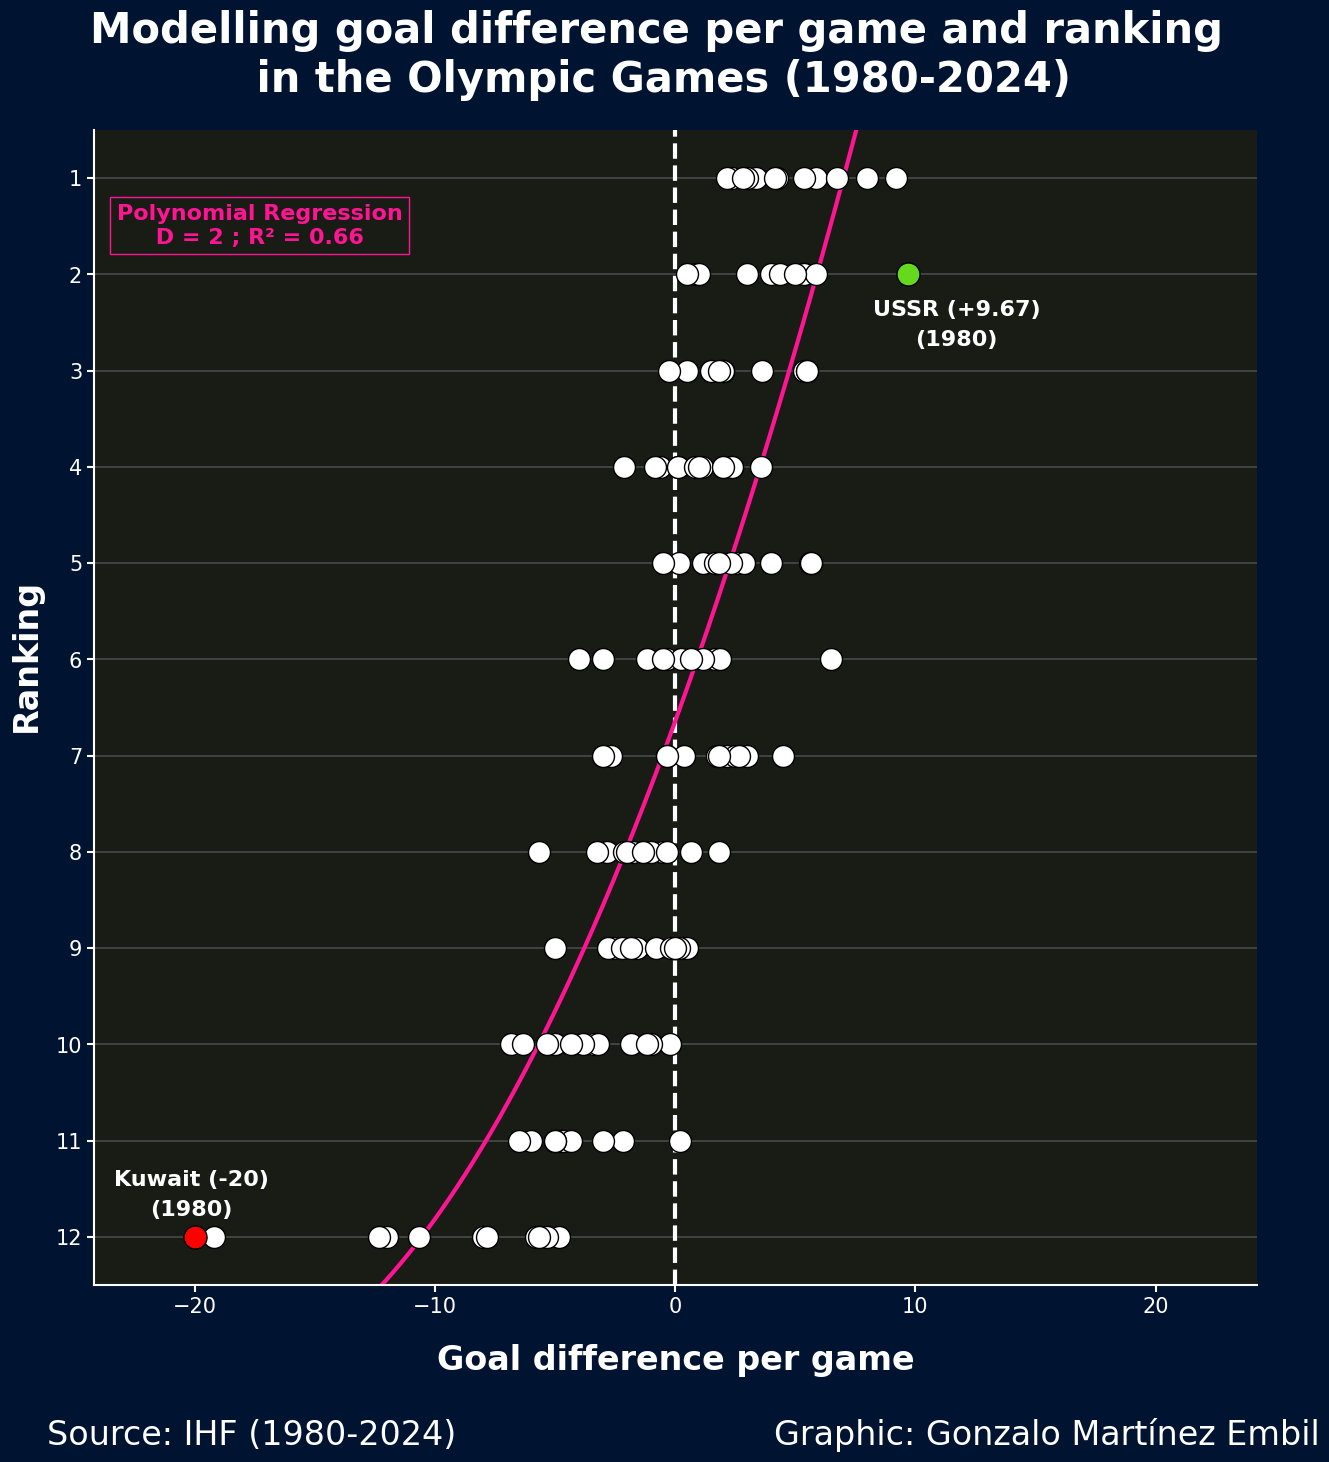

In [196]:
# Gráfico
fig, ax = plt.subplots(figsize=(15,15), facecolor='#001432')
ax.set_facecolor('#191c15')

# Grid
plt.grid(axis='y', alpha=1, linewidth=0.25, color='white', zorder=1)

# Puntos
plt.scatter(x, y, marker='o', color='white', label='2024', edgecolors='black', linewidths = 1, s=250, zorder=4)

# Línea de regresión
plt.plot(x_range, y_pred_poly, color='#FF1493', linewidth=3, label='Modelo polinómico (grado 2)')  

# Ejes
plt.yticks([i for i in range(1, 25)])
plt.gca().invert_yaxis()
plt.ylim(12.5, 0.5)
plt.tick_params(labelsize=15)

# Línea de corte
ax.axvline(x = 0, color='white', linestyle='dashed', ymax = 1, zorder=0, linewidth=3)
ax.axvline(x = 22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)
ax.axvline(x = -22, color='#191c15', linestyle='dashed', ymax = 1, zorder=0)

# Label
ax.tick_params(colors='white', length=5, width=1.5, which='both')

# Borders
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
for axis in ['bottom', 'left']:
  ax.spines[axis].set_color('white')
  ax.spines[axis].set_linewidth(1.5)
  ax.spines[axis].set_zorder(2)

# Puntos máximos
ax.scatter(9.67, 2,  marker='o', color='#65d91e', label='23/24', edgecolors = 'black', linewidths = 1, s=275, zorder=8)
fig.text(0.70, 0.76, 'USSR (+9.67)', ha='center', va='center', fontsize=16, color='white', weight='bold')
fig.text(0.70, 0.74, '(1980)', ha='center', va='center', fontsize=16, color='white', weight='bold')
ax.scatter(-20, 12,  marker='o', color='red', label='23/24', edgecolors = 'black', linewidths = 1, s=275, zorder=8)
fig.text(0.19, 0.18, 'Kuwait (-20)', ha='center', va='center', fontsize=16, color='white', weight='bold')
fig.text(0.19, 0.16, '(1980)', ha='center', va='center', fontsize=16, color='white', weight='bold')

# Texto
fig.text(0.5,0.93, 'Modelling goal difference per game and ranking\n in the Olympic Games (1980-2024)', ha='center', va='center', fontsize=30, color='white', weight='bold')
fig.text(0.23, 0.01, 'Source: IHF (1980-2024)', ha='center', va='center', fontsize=24, color='white')
fig.text(0.513, 0.06, 'Goal difference per game', ha='center', va='center', fontsize=24, color='white', weight='bold')
fig.text(0.76, 0.01, 'Graphic: Gonzalo Martínez Embil', ha='center', va='center', fontsize=24, color='white')
fig.text(0.08, 0.53, 'Ranking', rotation=90, ha='center', va='center', fontsize=24, color='white', weight='bold')
fig.text(0.14, 0.8045, 'Polynomial Regression\n     D = 2 ; R² = 0.66', fontsize=16, color='#FF1493', weight='bold', bbox=dict(facecolor='#191c15', edgecolor='#FF1493', pad=5))

fig.savefig('Modelling goal difference per game and ranking\n in the Olympic Games (1980-2024).png', dpi=200, bbox_inches='tight', pad_inches=0.5)

plt.show()